# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression.
## Part 1 - Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#Generating Data
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

In [4]:
x

array([  0.35281047,   0.79431716,   1.62431903,   2.59103578,
         3.23065446,   3.375973  ,   4.47573197,   4.96972856,
         5.69364194,   6.51069113,   7.17166586,   8.14799756,
         8.72363612,   9.31004929,  10.08877265])

In [5]:
y

array([ 0.43770571,  0.99517935,  1.24877201,  0.98630796,  0.36408873,
        0.07512287, -0.16081   , -0.05233879,  0.3187423 ,  1.53763897,
        1.82595557,  2.31966323,  2.08031157,  1.81942995,  1.21213026])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    

### Question 1

Defining a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.
The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X_train.reshape(11,1))
X_poly.shape

(11, 3)

In [8]:
poly.fit_transform(np.linspace(0,10,100).reshape(100,1)).shape

(100, 3)

In [9]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    result = np.zeros((4, 100))
    for i, degree in enumerate([1, 3, 6, 9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)))
        result[i, :] = y
    return result

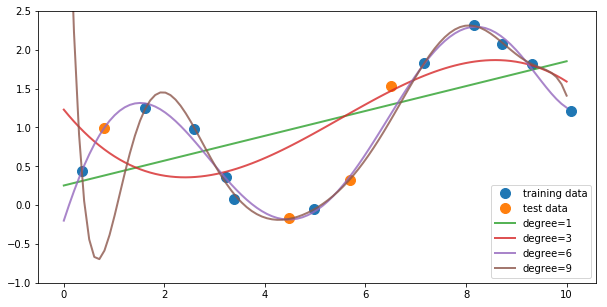

In [10]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())